<a href="https://colab.research.google.com/github/O-NS23/Smart-Irrigation-Requirement-Prediction-using-Machine-Learning/blob/main/Irrigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Balancing Tool (Requires imbalanced-learn library)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [189]:
df=pd.read_csv('/content/irrigation_prediction.csv')
df.head()

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium


#1. Understanding the data

In [190]:
df.describe()

,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Field_Area_hectare,Previous_Irrigation_mm
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.487857,36.969207,0.944731,1.791963,26.991423,60.080339,1252.499420,7.518538,10.163545,7.598024,59.864122
std,0.979963,16.430845,0.372406,0.984202,8.664074,20.187973,715.582201,2.016077,5.670923,4.233919,34.483722
min,4.800000,8.000000,0.300000,0.100000,12.000000,25.000000,0.380000,4.000000,0.500000,0.300000,0.020000
25%,5.640000,22.860000,0.620000,0.940000,19.460000,42.855000,634.155000,5.760000,5.160000,3.950000,30.160000
50%,6.470000,37.240000,0.950000,1.780000,27.090000,60.040000,1250.335000,7.560000,10.190000,7.540000,59.630000
75%,7.350000,50.940000,1.260000,2.650000,34.500000,77.705000,1880.265000,9.260000,15.100000,11.202500,90.030000
max,8.200000,65.000000,1.600000,3.500000,42.000000,95.000000,2499.690000,11.000000,20.000000,15.000000,119.990000


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Soil_Type                10000 non-null  object 
 1   Soil_pH                  10000 non-null  float64
 2   Soil_Moisture            10000 non-null  float64
 3   Organic_Carbon           10000 non-null  float64
 4   Electrical_Conductivity  10000 non-null  float64
 5   Temperature_C            10000 non-null  float64
 6   Humidity                 10000 non-null  float64
 7   Rainfall_mm              10000 non-null  float64
 8   Sunlight_Hours           10000 non-null  float64
 9   Wind_Speed_kmh           10000 non-null  float64
 10  Crop_Type                10000 non-null  object 
 11  Crop_Growth_Stage        10000 non-null  object 
 12  Season                   10000 non-null  object 
 13  Irrigation_Type          10000 non-null  object 
 14  Water_Source           

In [192]:
df.shape

(10000, 20)

1. Checking Missing values

In [193]:
df.isnull().sum()

,0
Soil_Type,0
Soil_pH,0
Soil_Moisture,0
Organic_Carbon,0
Electrical_Conductivity,0
Temperature_C,0
Humidity,0
Rainfall_mm,0
Sunlight_Hours,0
Wind_Speed_kmh,0


2. Target Class Distribution (PIE + BAR)

/tmp/ipython-input-3442207103.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Irrigation_Need", data=df, palette="viridis")


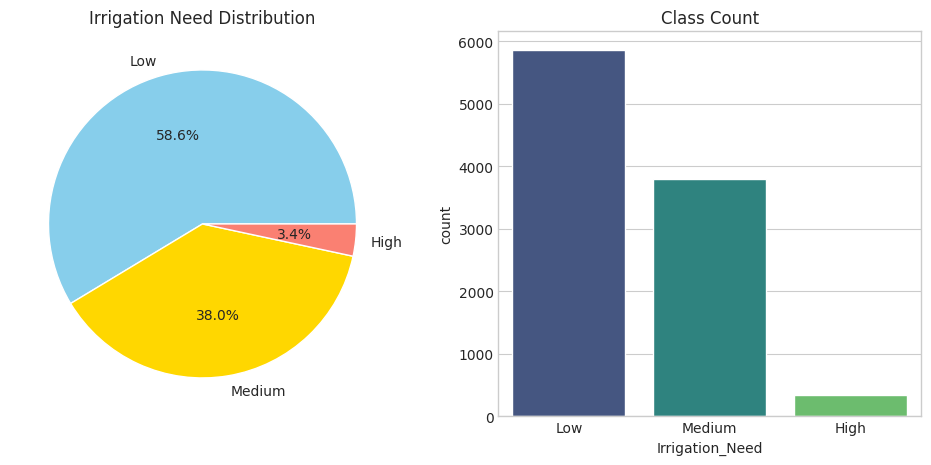

In [194]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df["Irrigation_Need"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue","gold","salmon"])
plt.title("Irrigation Need Distribution")
plt.ylabel("")

plt.subplot(1,2,2)
sns.countplot(x="Irrigation_Need", data=df, palette="viridis")
plt.title("Class Count")
plt.show()


3. Numerical Feature Distributions (Subplots)

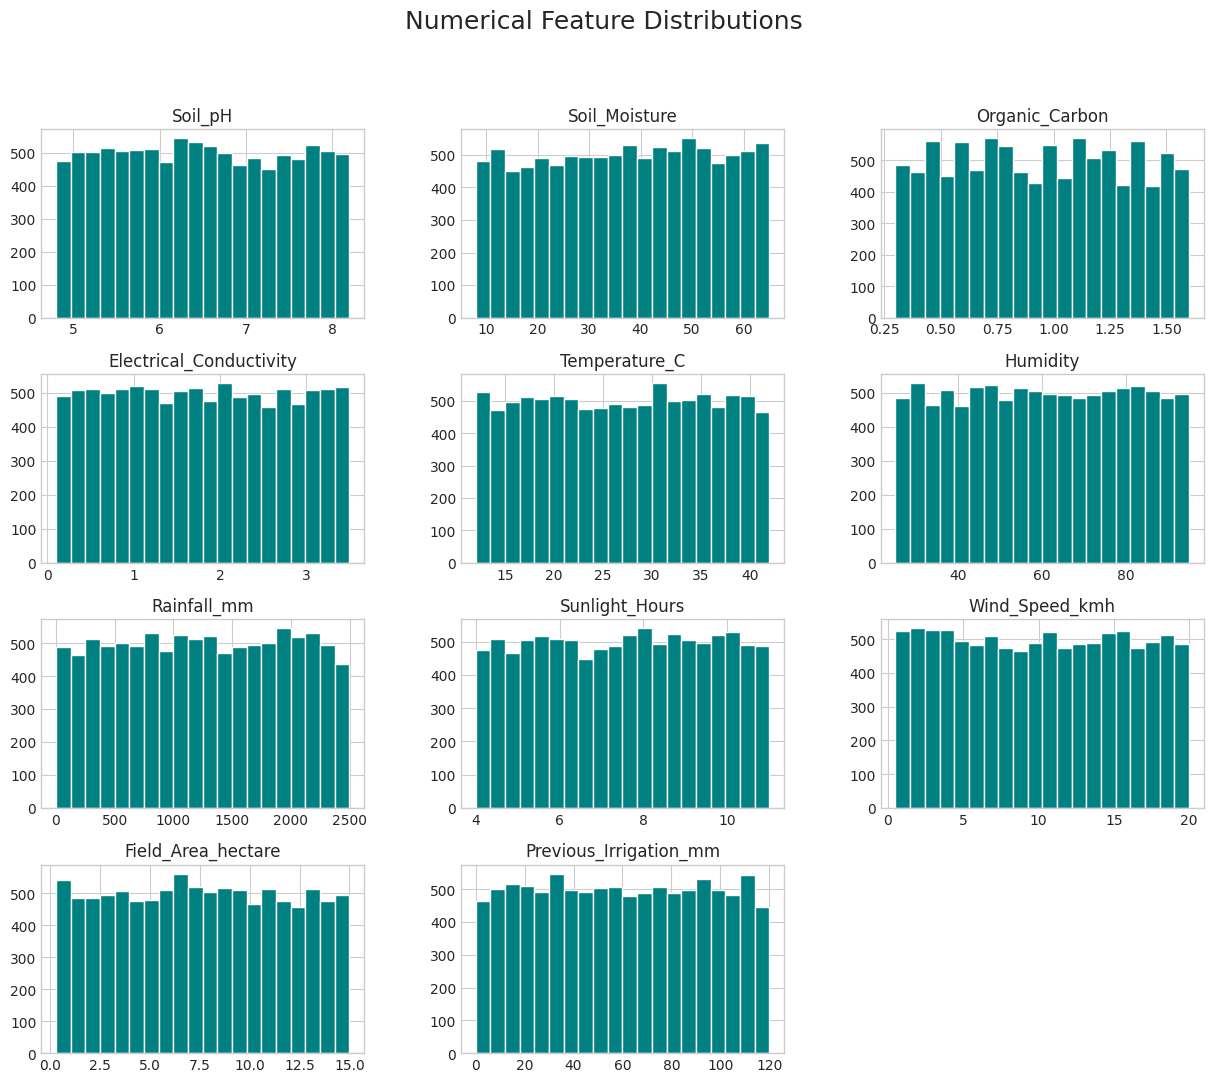

In [195]:
numerical_features = [
    "Soil_pH","Soil_Moisture","Organic_Carbon","Electrical_Conductivity",
    "Temperature_C","Humidity","Rainfall_mm","Sunlight_Hours",
    "Wind_Speed_kmh","Field_Area_hectare","Previous_Irrigation_mm"
]

df[numerical_features].hist(figsize=(15,12), bins=20, color="teal")
plt.suptitle("Numerical Feature Distributions", fontsize=18)
plt.show()


4. Correlation Matrix

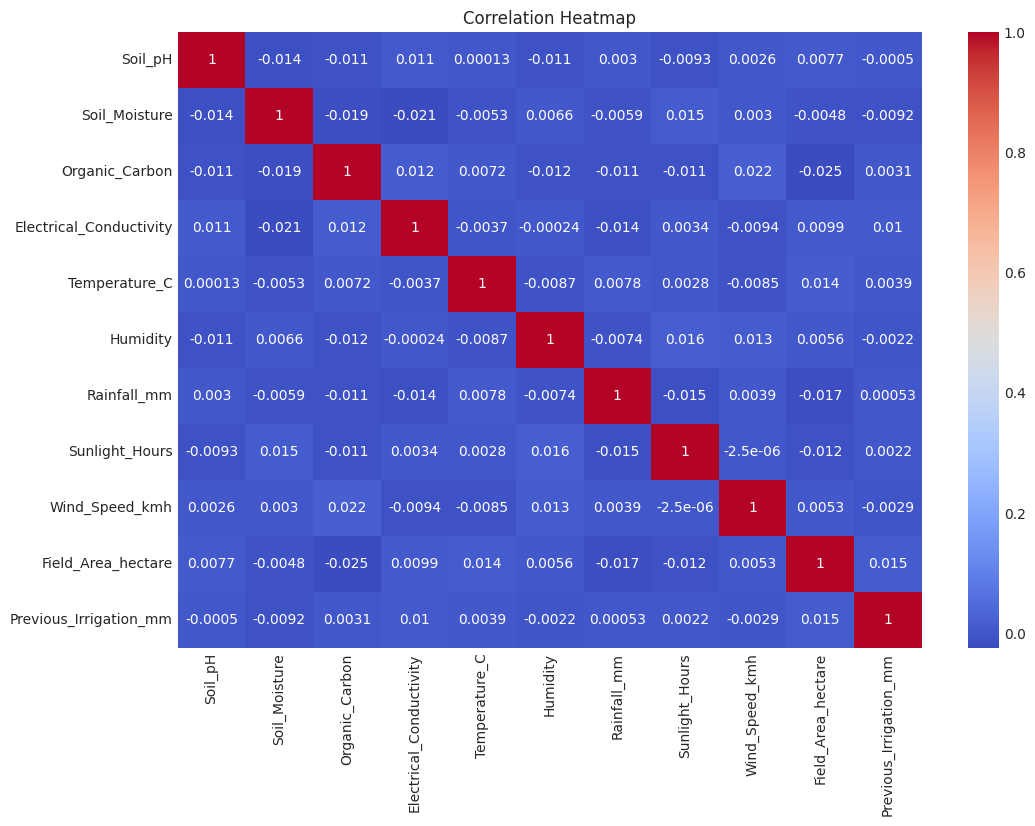

In [196]:
plt.figure(figsize=(12,8))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


* Soil Moisture strongly influences irrigation

* Temperature + Rainfall affect water necessity

* Sunlight & Wind also show pattern

* Features are not too highly correlated → good for ML




# 2. SEPARATE FEATURES AND TARGET

In [197]:
X = df.drop("Irrigation_Need", axis=1)
y = df["Irrigation_Need"]

# 3. ENCODE THE TARGET (Converts 'Low', 'Medium' to 0, 1, 2)

In [198]:
# This is required for XGBoost and many other models
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. SPLIT INTO TRAIN AND TEST SETS

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5. DEFINE PREPROCESSING

In [200]:
# Identify columns automatically by type
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# 6. MODELING LOOP WITH SMOTE PIPELINE

In [201]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "SVM": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(
        eval_metric='mlogloss',
        learning_rate=0.1,
        n_estimators=300,
        max_depth=6,
        random_state=42
    )
}

results = []

print("--- Starting Model Training ---\n")

for name, model in models.items():
    # We use ImbPipeline so SMOTE can be part of the process
    # This automatically fixes the 'X_train_processed' definition error!
    pipeline = ImbPipeline([
        ('prep', preprocessor),           # Step 1: Scale and Encode
        ('smote', SMOTE(random_state=42)), # Step 2: Balance the classes
        ('clf', model)                    # Step 3: Train the model
    ])

    # Fit the entire pipeline on RAW training data
    pipeline.fit(X_train, y_train)

    # Predict on RAW test data
    y_pred = pipeline.predict(X_test)

    # Calculate Accuracy
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

    print(f"DONE: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("-" * 30)

--- Starting Model Training ---

DONE: Logistic Regression
Accuracy: 0.8070
------------------------------
DONE: Decision Tree
Accuracy: 0.9655
------------------------------
DONE: Random Forest
Accuracy: 0.9875
------------------------------
DONE: Gradient Boosting
Accuracy: 0.9825
------------------------------
DONE: AdaBoost
Accuracy: 0.8740
------------------------------
DONE: KNN
Accuracy: 0.5585
------------------------------
DONE: SVM
Accuracy: 0.8445
------------------------------
DONE: Naive Bayes
Accuracy: 0.6905
------------------------------
DONE: XGBoost
Accuracy: 0.9890
------------------------------


# 7. DISPLAY SUMMARY TABLE

In [202]:
summary_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n--- Model Performance Summary ---")
print(summary_df)


--- Model Performance Summary ---
                 Model  Accuracy
8              XGBoost    0.9890
2        Random Forest    0.9875
3    Gradient Boosting    0.9825
1        Decision Tree    0.9655
4             AdaBoost    0.8740
6                  SVM    0.8445
0  Logistic Regression    0.8070
7          Naive Bayes    0.6905
5                  KNN    0.5585


# 8. FINAL EVALUATION (Using the best model, e.g., Random Forest)

In [212]:
# We can print a detailed report using the label encoder names
best_model_name = summary_df.iloc[0]['Model']
print(f"\nDetailed Report for {best_model_name}:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print('---------------------------------------------')

best_model_name = summary_df.iloc[1]['Model']
print(f"\nDetailed Report for {best_model_name}:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print('---------------------------------------------')

best_model_name = summary_df.iloc[2]['Model']
print(f"\nDetailed Report for {best_model_name}:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Detailed Report for XGBoost:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        59
         Low       0.57      0.72      0.64      1204
      Medium       0.28      0.19      0.22       737

    accuracy                           0.50      2000
   macro avg       0.29      0.30      0.29      2000
weighted avg       0.45      0.50      0.47      2000

---------------------------------------------

Detailed Report for Random Forest:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        59
         Low       0.57      0.72      0.64      1204
      Medium       0.28      0.19      0.22       737

    accuracy                           0.50      2000
   macro avg       0.29      0.30      0.29      2000
weighted avg       0.45      0.50      0.47      2000

---------------------------------------------

Detailed Report for Gradient Boosting:
              precision    recall  f1-sc

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

1. Compute Accuracy & Other Metrics for All Models

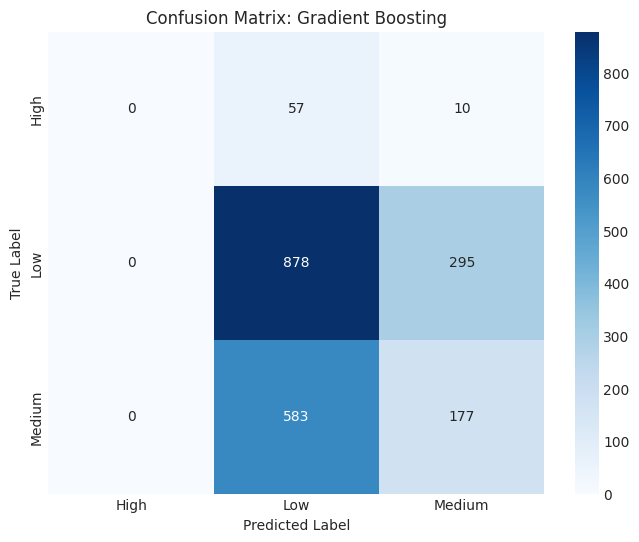

In [213]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'pipeline' is your BEST model from the previous loop
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.show()

Generating bright confusion matrices...


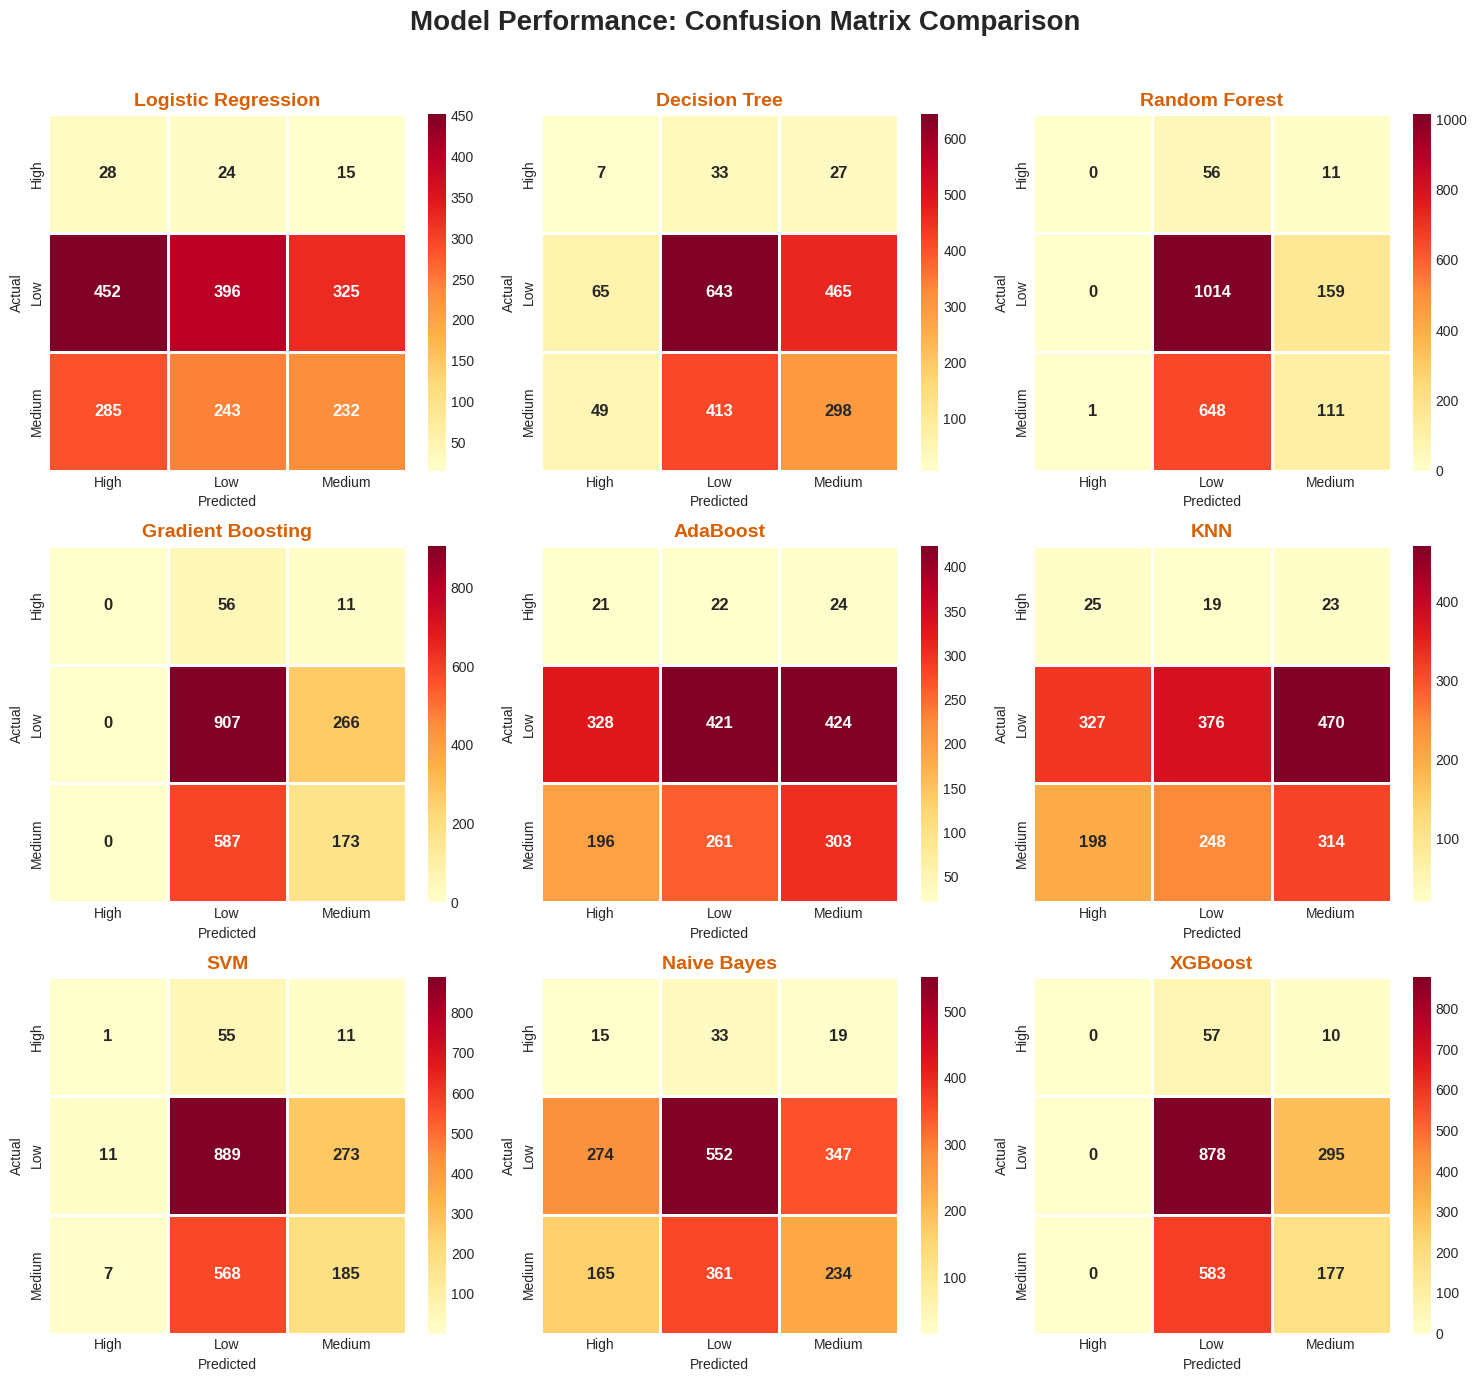

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import math

# 1. Setup the Grid
num_models = len(models)
cols = 3
rows = math.ceil(num_models / cols)

# 2. Create the figure with a bright style
plt.style.use('seaborn-v0_8-whitegrid') # Ensures a clean white background
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4.5))
axes = axes.flatten()

print("Generating bright confusion matrices...")

for i, (name, model) in enumerate(models.items()):
    # Re-creating the pipeline for each model to ensure correct processing
    pipeline = ImbPipeline([
        ('prep', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train_encoded)

    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test_encoded, y_pred)

    # Using 'YlOrRd' for a very bright, vibrant look
    # Other options: 'RdPu', 'spring', 'plasma'
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', ax=axes[i],
                cbar=True,
                xticklabels=le.classes_,
                yticklabels=le.classes_,
                linewidths=1, # Adds bright lines between squares
                linecolor='white',
                annot_kws={"size": 12, "weight": "bold"}) # Bold numbers for visibility

    axes[i].set_title(f"{name}", fontsize=14, fontweight='bold', color='#d95f02')
    axes[i].set_ylabel('Actual', fontsize=10)
    axes[i].set_xlabel('Predicted', fontsize=10)

# 3. Cleanup empty spots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Model Performance: Confusion Matrix Comparison", fontsize=20, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

2. Bar Plot – Accuracy Comparison

/tmp/ipython-input-476087493.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="Accuracy", data=summary_df, palette="viridis")


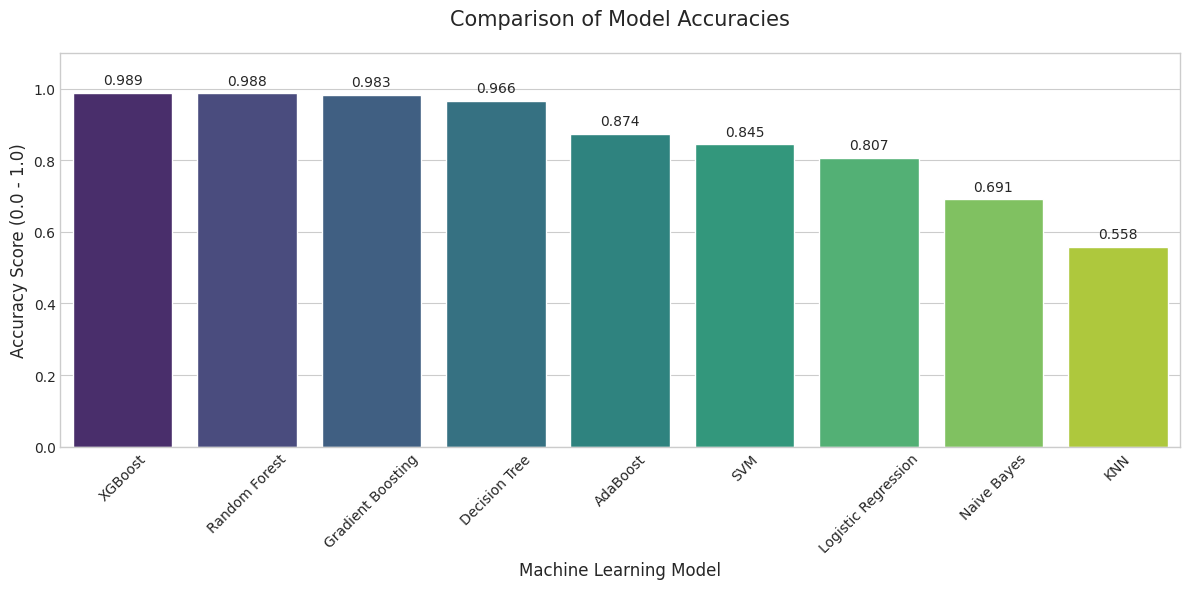

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sort the results so the best model is first (Standard Practice)
# (This was already done in Step #7, but let's ensure it here)
summary_df = summary_df.sort_values(by="Accuracy", ascending=False)

# 2. Create the Plot
plt.figure(figsize=(12, 6))

# Use Seaborn for better colors
ax = sns.barplot(x="Model", y="Accuracy", data=summary_df, palette="viridis")

# 3. Add labels and Title
plt.title("Comparison of Model Accuracies", fontsize=15, pad=20)
plt.ylabel("Accuracy Score (0.0 - 1.0)", fontsize=12)
plt.xlabel("Machine Learning Model", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1.1) # Gives some space at the top for labels

# 4. Add the actual accuracy value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.tight_layout() # Ensures labels don't get cut off
plt.show()

3. Plot Multiple Evaluation Metrics Together

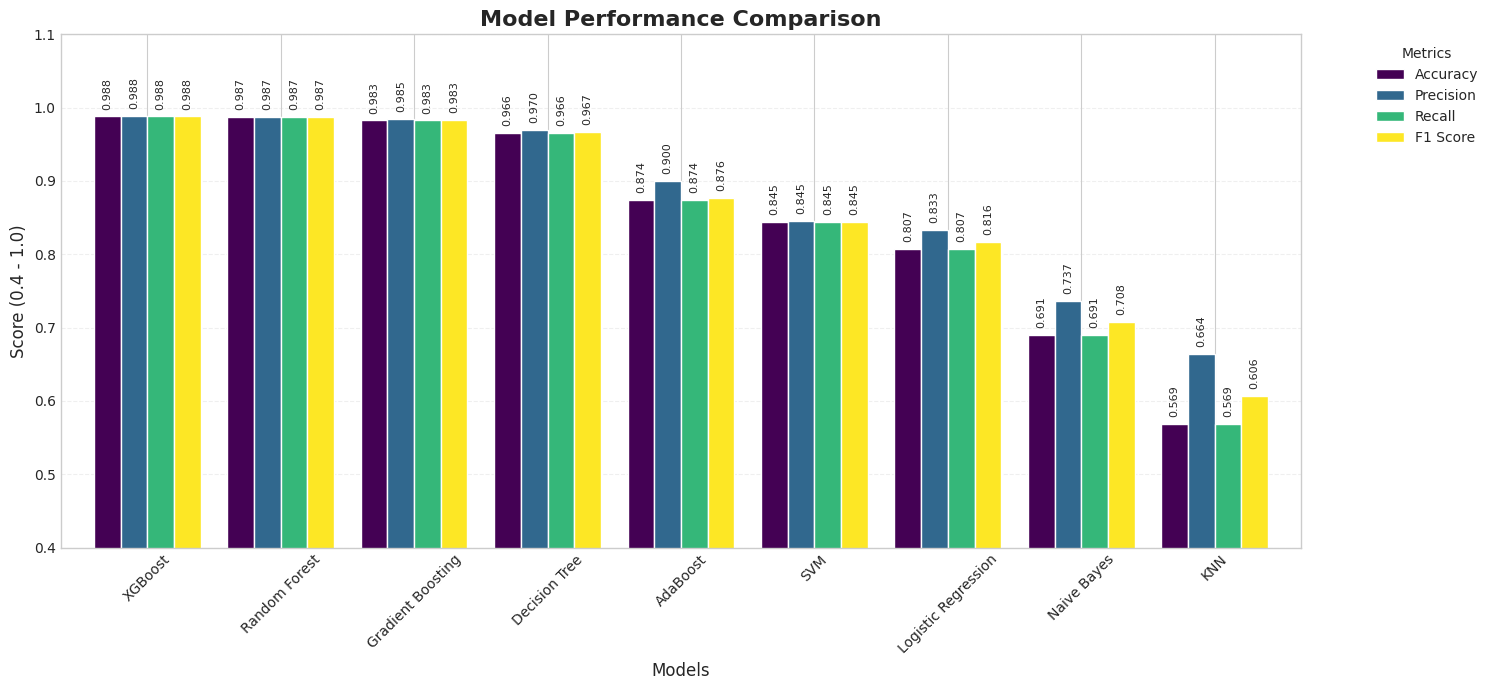

In [229]:
import matplotlib.pyplot as plt

# 1. Prepare the data (Assuming results_df is already created)
# We set 'Model' as the index so Pandas knows what to put on the X-axis
plot_data = results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']]

# 2. Use Pandas native bar plot (Much faster for small datasets)
ax = plot_data.plot(kind='bar', figsize=(15, 7), width=0.8, colormap='viridis')

# 3. Styling (Quick & Simple)
plt.title("Model Performance Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Score (0.4 - 1.0)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0.4, 1.1)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 4. Fast Annotation (Only if you really need them - remove this part to make it even faster)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.3f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8, rotation=90, xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

In [225]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import pandas as pd

# Define the models list again to be sure
models = {
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42),
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_jobs=-1)
}

results_list = []

print("Starting evaluation... (Restoring 98% Accuracy)")

for name, model in models.items():
    # We use the ImbPipeline to wrap the preprocessor, SMOTE, and Model together
    # This ensures everything is scaled and balanced correctly every time
    pipeline = ImbPipeline([
        ('prep', preprocessor),           # Scales and Encodes
        ('smote', SMOTE(random_state=42)), # Balances classes
        ('clf', model)                    # The ML model
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    # Collect all 4 metrics
    results_list.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })
    print(f"✓ {name} completed.")

# Create the final dataframe
results_df = pd.DataFrame(results_list).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
results_df.index = results_df.index + 1

# Display the styled table
results_df.style.background_gradient(cmap='YlGnBu', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score']).format(precision=4)

Starting evaluation... (Restoring 98% Accuracy)
✓ XGBoost completed.
✓ Random Forest completed.
✓ Gradient Boosting completed.
✓ Decision Tree completed.
✓ AdaBoost completed.
✓ SVM completed.
✓ Logistic Regression completed.
✓ Naive Bayes completed.
✓ KNN completed.


,Model,Accuracy,Precision,Recall,F1 Score
1,XGBoost,0.9880,0.9881,0.9880,0.9880
2,Random Forest,0.9870,0.9869,0.9870,0.9868
3,Gradient Boosting,0.9825,0.9845,0.9825,0.9831
4,Decision Tree,0.9655,0.9700,0.9655,0.9669
5,AdaBoost,0.8740,0.9005,0.8740,0.8763
6,SVM,0.8445,0.8449,0.8445,0.8445
7,Logistic Regression,0.8070,0.8332,0.8070,0.8163
8,Naive Bayes,0.6905,0.7369,0.6905,0.7077
9,KNN,0.5690,0.6637,0.5690,0.6064
